In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

import plotly.plotly as py
import cufflinks as cf
cf.go_offline()

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import math
from IPython.display import display, HTML
#%timeit ,  line_profiler, memory_profiler

## Definitions

In [2]:
def tcor(df):
    display(df.corr())
    fig, ax = plt.subplots(figsize=(6,5)) 
    v_cr = sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")
    
def thist(df):
    dat = df.select_dtypes(include=['float64','int64'])
    side = math.ceil(math.sqrt(dat.shape[1]))
    fig, frame = plt.subplots(side, side,figsize=(12,8))
    fig.tight_layout()
    x = 0
    y = 0
    
    for i, ax in enumerate(fig.axes):
        try:
            col = dat.columns[i]
            ax.set_xlabel(col)
            ax.hist(dat[col])
        except IndexError:
            pass

    plt.show()
    dat.iplot(kind='box')
    
def load(namefile):
    return pd.read_csv('../../../datasets/'+namefile, index_col=False)

def get_div(alist, values):
    init = """
        <body>
        <style>
        .announce {
            color: #208ffb;
            font-weight: bold;
        }
        </style><div class="announce">NULLs in dataset:<br>---------------------<br>
        """
    inner = ""
    if type(alist)==list:
        for col, val in zip(alist, values):
            inner += col +": " + str(val) + "<br>"
    else:
        inner = alist
    closing = "</div></body>"
    html = init + inner + closing
    return html
        

def print_nulls(data):
    null_cols = data.isnull().sum()
    null_cols = null_cols[null_cols>0]
    drop_cols = list(null_cols[null_cols > 0].index)
    val_cols = [null_cols[col] for col in drop_cols]
    if len(drop_cols)==0:
        display(HTML(get_div('<br>This dataset has no nulls<br><br>','')))
    else:
        display(HTML(get_div(drop_cols,val_cols)))


def summary(csv):
    df = load(csv)
    display(df.head(2))
    display(df.tail(2))
    print_nulls(df)
    display(df.info())
    tcor(df)
    return df
    

## taking a look

,Unnamed: 0,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
0,1,1499,25,80,4,14,no,no,yes,94,1
1,2,1795,33,85,2,14,no,no,yes,94,1


,Unnamed: 0,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
6257,6258,2195,100,850,16,15,yes,no,yes,39,35
6258,6259,2490,100,850,16,17,yes,no,yes,39,35


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6259 entries, 0 to 6258
Data columns (total 11 columns):
Unnamed: 0    6259 non-null int64
price         6259 non-null int64
speed         6259 non-null int64
hd            6259 non-null int64
ram           6259 non-null int64
screen        6259 non-null int64
cd            6259 non-null object
multi         6259 non-null object
premium       6259 non-null object
ads           6259 non-null int64
trend         6259 non-null int64
dtypes: int64(8), object(3)
memory usage: 538.0+ KB


None

,Unnamed: 0,price,speed,hd,ram,screen,ads,trend
Unnamed: 0,1.000000,-0.199924,0.388566,0.555492,0.265376,0.184699,-0.272714,0.989818
price,-0.199924,1.000000,0.300976,0.430258,0.622748,0.296041,0.054540,-0.199987
speed,0.388566,0.300976,1.000000,0.372304,0.234760,0.189074,-0.215232,0.405438
hd,0.555492,0.430258,0.372304,1.000000,0.777726,0.232802,-0.323222,0.577790
ram,0.265376,0.622748,0.234760,0.777726,1.000000,0.208954,-0.181670,0.276844
screen,0.184699,0.296041,0.189074,0.232802,0.208954,1.000000,-0.093919,0.188614
ads,-0.272714,0.054540,-0.215232,-0.323222,-0.181670,-0.093919,1.000000,-0.318553
trend,0.989818,-0.199987,0.405438,0.577790,0.276844,0.188614,-0.318553,1.000000


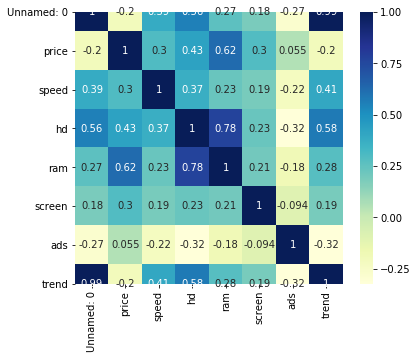

In [3]:
df = summary('Computers.csv')

## graphs

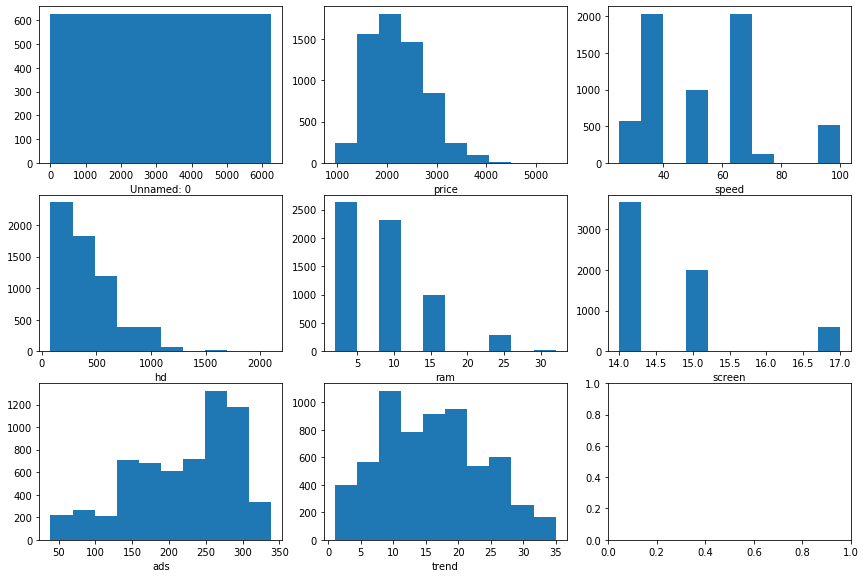

In [4]:
thist(df)

## taking a look

,game,platform,developer,genre,number_players,rating,release_date,positive_critics,neutral_critics,negative_critics,positive_users,neutral_users,negative_users,metascore,user_score
0,Portal 2,PC,Valve Software,Action,NaN,E10+,"Apr 18, 2011",51,1,0,1700,107,19,95,90
1,The Elder Scrolls V: Skyrim,PC,Bethesda Game Studios,Role-Playing,No Online Multiplayer,M,"Nov 10, 2011",32,0,0,1616,322,451,94,82


,game,platform,developer,genre,number_players,rating,release_date,positive_critics,neutral_critics,negative_critics,positive_users,neutral_users,negative_users,metascore,user_score
5697,Vane,PS4,Friend & Foe,Adventure,No Online Multiplayer,E10+,"Jan 15, 2019",3,26,22,2,2,2,49,55
5698,Left Alive,PS4,"Square Enix, ilinx inc.",Action Adventure,No Online Multiplayer,M,"Mar 5, 2019",1,7,27,25,8,21,37,79


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5699 entries, 0 to 5698
Data columns (total 15 columns):
game                5699 non-null object
platform            5699 non-null object
developer           5685 non-null object
genre               5694 non-null object
number_players      3059 non-null object
rating              4433 non-null object
release_date        5699 non-null object
positive_critics    5699 non-null int64
neutral_critics     5699 non-null int64
negative_critics    5699 non-null int64
positive_users      5699 non-null int64
neutral_users       5699 non-null int64
negative_users      5699 non-null int64
metascore           5699 non-null int64
user_score          5699 non-null int64
dtypes: int64(8), object(7)
memory usage: 667.9+ KB


None

,positive_critics,neutral_critics,negative_critics,positive_users,neutral_users,negative_users,metascore,user_score
positive_critics,1.000000,0.025827,-0.208794,0.498124,0.408805,0.172460,0.550571,0.335046
neutral_critics,0.025827,1.000000,0.254702,0.012544,0.148627,0.102147,-0.319653,-0.153139
negative_critics,-0.208794,0.254702,1.000000,-0.029716,0.020774,0.073831,-0.660855,-0.397001
positive_users,0.498124,0.012544,-0.029716,1.000000,0.714788,0.424721,0.234064,0.131384
neutral_users,0.408805,0.148627,0.020774,0.714788,1.000000,0.649939,0.161325,-0.023144
negative_users,0.172460,0.102147,0.073831,0.424721,0.649939,1.000000,0.033951,-0.200107
metascore,0.550571,-0.319653,-0.660855,0.234064,0.161325,0.033951,1.000000,0.550555
user_score,0.335046,-0.153139,-0.397001,0.131384,-0.023144,-0.200107,0.550555,1.000000


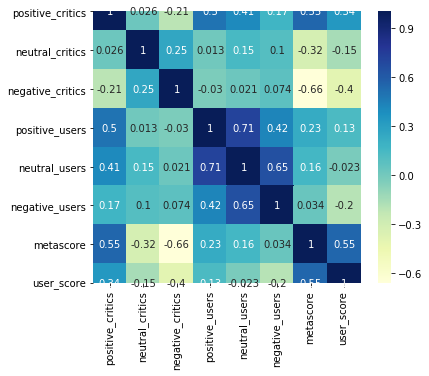

In [5]:
df = summary('metacritic_games.csv')

## graphs

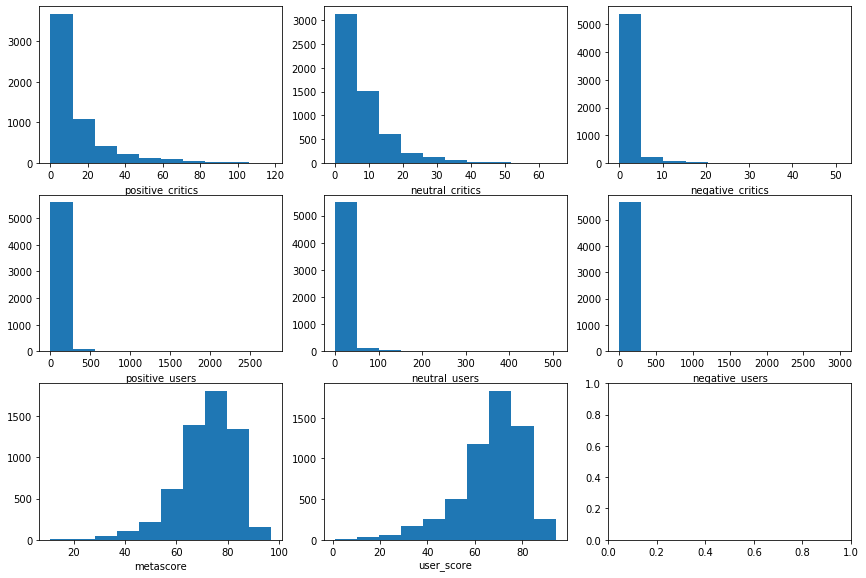

In [6]:
thist(df)

# Counting Null values

In [7]:
null_cols = df.isnull().sum()
null_cols[null_cols>0]

developer           14
genre                5
number_players    2640
rating            1266
dtype: int64

# Denulling some columns

In [8]:
#df['genre'].unique()
nl_genre = list(df[df['genre'].isna()]['game'])
nl_genre
rb_genre = ['Adventure','Shooter',"Beat-'Em-Up",'Adventure','Action Adventure']

def denull(df, col_by, col_at, list_nullby, list_val):
    if df is not None and col_by and col_at and list_nullby and list_val:
        for (null_by, ok_val) in zip(list_nullby, list_val):
            df.loc[df[col_by] == null_by, col_at] = ok_val
    return df

df = denull(df, 'game', 'genre', nl_genre, rb_genre)

#df.loc[df['game'] == nl_genre[0]]
nl_dev = list(df[df['developer'].isna()]['game'])
nl_dev
rb_dev = ['EA UK','Burut CT',"Michaela Laws",'Out Of The Park Developments',
          'Red Barrels','Sony Interactive Entertainment','Centauri Production',
          'Capcom Vancouver','Bungie','Sega','Sledgehammer Games','Nude Maker',
          'Beep Games','WWO Partners']

df = denull(df, 'game', 'developer', nl_dev, rb_dev)

null_cols = df.isnull().sum()
null_cols[null_cols > 0]

#df[(df['developer'].notna()) & (df['developer'].str.contains('ww'))]

['Memento Mori 2',
 'Destiny: The Taken King',
 '3D Fantasy Zone II W',
 'NightCry',
 'Voodoo Vince Remastered']

['Harry Potter and the Deathly Hallows, Part 2',
 'Cannon Fodder 3',
 'Seduce Me',
 'Out of the Park Baseball 15',
 'Outlast: Whistleblower',
 'Dead Nation',
 'Memento Mori 2',
 'Dead Rising 3: Operation Broken Eagle',
 'Destiny: The Taken King',
 '3D Fantasy Zone II W',
 'Call of Duty: Advanced Warfare - Supremacy',
 'NightCry',
 'Voodoo Vince Remastered',
 'Wild West Online']

number_players    2640
rating            1266
dtype: int64

# Re-Grouping 'number_players' and mark as Unknown

In [12]:
types = list(df['number_players'].unique())
types[:5]

depurable = [ty for ty in types if type(ty)==str and (not 'Multiplayer' in ty and not '1 Player' in ty)]
depurable[:5]
final_types = {'2':'2 Players', '-':'Variable','Up to':'Online Multiplayer'
              ,'  Online':'Online Multiplayer'}

for ty in depurable:
    for key in final_types.keys():
        if ty == '2 ':
            df.loc[(df['number_players'].notna())&
                   (df['number_players'].str.strip()==key),'number_players'] = final_types[key]
        df.loc[(df['number_players'].notna())&
               (df['number_players'].str.contains(key)),'number_players'] = final_types[key]

df.loc[df['number_players'].isna(),'number_players'] = 'UNKNOWN'

['UNKNOWN',
 'No Online Multiplayer',
 '1 Player',
 'Online Multiplayer',
 '2 Players']

['UNKNOWN', '2 Players', 'Variable']

In [11]:
num = df.groupby(['number_players']).count()
num.shape
num

(7, 14)

,game,platform,developer,genre,rating,release_date,positive_critics,neutral_critics,negative_critics,positive_users,neutral_users,negative_users,metascore,user_score
number_players,,,,,,,,,,,,,,
1 Player,93,93,93,93,76,93,93,93,93,93,93,93,93,93
2 Players,263,263,263,263,253,263,263,263,263,263,263,263,263,263
Massively Multiplayer,19,19,19,19,18,19,19,19,19,19,19,19,19,19
No Online Multiplayer,1869,1869,1869,1869,1310,1869,1869,1869,1869,1869,1869,1869,1869,1869
Online Multiplayer,785,785,785,785,664,785,785,785,785,785,785,785,785,785
UNKNOWN,2640,2640,2640,2640,2083,2640,2640,2640,2640,2640,2640,2640,2640,2640
Variable,30,30,30,30,29,30,30,30,30,30,30,30,30,30


In [14]:
df['rating'].unique()
rt = df.groupby(['rating']).count()
rt

array(['E10+', 'M', 'T', 'E', nan, 'RP', 'AO'], dtype=object)

,game,platform,developer,genre,number_players,release_date,positive_critics,neutral_critics,negative_critics,positive_users,neutral_users,negative_users,metascore,user_score
rating,,,,,,,,,,,,,,
AO,2,2,2,2,2,2,2,2,2,2,2,2,2,2
E,890,890,890,890,890,890,890,890,890,890,890,890,890,890
E10+,915,915,915,915,915,915,915,915,915,915,915,915,915,915
M,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247
RP,19,19,19,19,19,19,19,19,19,19,19,19,19,19
T,1360,1360,1360,1360,1360,1360,1360,1360,1360,1360,1360,1360,1360,1360
